In [3]:
from keras.datasets import cifar100
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras import models
from keras.models import Sequential
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


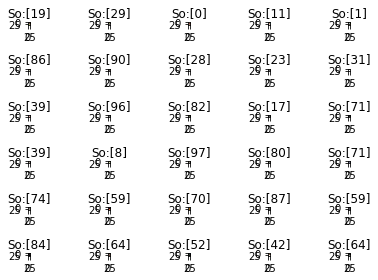

In [4]:
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('So:{}'.format(y_train[i]))
  


In [5]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255


In [6]:
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [7]:
from keras.utils import to_categorical #one hot encoding
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(3000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 100)               300100    
                                                                 
Total params: 9,519,100
Trainable params: 9,519,100
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam',loss='mean_absolute_error',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=1500)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Do chinh xac tren tap kiem tra: ',test_acc)
print('ham mat mat tren tap kiem tra: ',test_loss)

Epoch 1/10
34/34 [==============================] - 6s 25ms/step - loss: 0.0195 - accuracy: 0.0241
Epoch 2/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0192 - accuracy: 0.0413
Epoch 3/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0192 - accuracy: 0.0418
Epoch 4/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0192 - accuracy: 0.0429
Epoch 5/10
34/34 [==============================] - 1s 23ms/step - loss: 0.0191 - accuracy: 0.0438
Epoch 6/10
34/34 [==============================] - 1s 26ms/step - loss: 0.0191 - accuracy: 0.0447
Epoch 7/10
34/34 [==============================] - 1s 38ms/step - loss: 0.0191 - accuracy: 0.0432
Epoch 8/10
34/34 [==============================] - 1s 33ms/step - loss: 0.0191 - accuracy: 0.0437
Epoch 9/10
34/34 [==============================] - 1s 28ms/step - loss: 0.0191 - accuracy: 0.0427
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.0432
Do chinh

In [11]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')